# 二分法

* 二分法也称为截断法，通过每次取两个区间的中点，多次迭代，不断逼近零点。

### 步骤

* 1.输入非线性函数`f(x)`和区间`[a,b]`。
* 2.判断`f(a) * f(b)`是否大于0
 * 如果大于0，则该区间不存在零件，重新输入区间，
 * else：
  * 循环：
     * if f(a) * f(b) == 0:
         * if f(a) == 0:
          * 则a就是零点，否则b就是零点。
     * 如果不等于0，找到区间的中点`mid`，判断区间的长度是否小于最小精度，如果小于，则输出；
     * 如果不小于，判断`f(mid) * f(a) > 0`:则`a = mid`；否则`b = mid`。
     * 继续执行，直到满足结果。

### 二分法的缺点

如果区间的某一个端点就在零点附近时，则不需要多次计算，二分法会执行多次。

In [11]:
import math
import time
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

def fun(x):
    '''
    f(x) = x^3 - x + 1
    '''
    f = math.pow(x, 3) - x - 1
    return f
    
def dichotomization():
    '''
    计算零点
    '''
    start = time.time()
    list = []#存储每次迭代的与x轴的交点
    list_acc = []#存储误差
    flag = True
    while (flag):
        a = float(input('请输入左端点值:'))
        b = float(input('请输入右端点值:'))
        accuracy = float(input('请输入精度:'))

        k = 0
        if fun(a) * fun(b) > 0:
            print('请重新输入！！！')
        else:
            while (flag):
                if (fun(a) * fun(b) == 0.0):
                    if fun(a) == 0.0:  # 函数的最小值刚好是零点
                        print(a)
                        print('迭代次数为:',k)
                        flag = False
                    else:
                        print(b)
                        print('迭代次数为:',k)

                        flag = False
                    break
                else:
                    mid = (a + b) / 2  # 找到二者的中点
                    list.append(mid)
                    list_acc.append(abs(b - a))
                    if abs(b - a) < accuracy:  # 满足最小精度值
                        print(mid)
                        print('迭代次数为:',k)

                        flag = False
                        break

                    else:
                        if fun(a) * fun(mid) > 0:
                            a = mid  # 中点值在零点左边
                        else:
                            b = mid  # 中点值在零点右边
                        k = k + 1  # 迭代次数
    end = time.time()
    print('运行时间为:',end - start)

In [12]:
def showfunction():
    '''
    显示函数图像
    '''
    plt.subplot(211)
    x = np.arange(-2,3,0.1)
    y = x * x * x - x - 1
    y1 = 0
    plt.plot(x,y)
    plt.plot([-2,3],[0,0])
    plt.plot([mid,mid],[-10,0])
    plt.axis([-2,3,-6,10])
    plt.title('函数曲线')
    plt.scatter(mid,0,c = 'r')
    for x in list:
        plt.scatter(x,0,c = 'r')

    #误差曲线
    plt.subplot(212)
    plt.plot(list_acc)
    plt.title('loss函数')
    plt.show()

In [15]:
dichotomization()

请输入左端点值:1
请输入右端点值:3
请输入精度:0.0001
1.324737548828125
迭代次数为: 15
运行时间为: 3.416471242904663


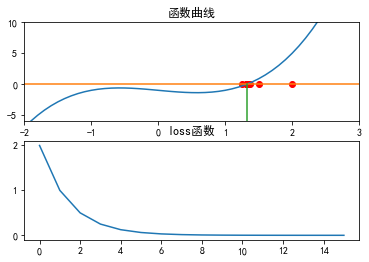

In [16]:
showfunction()